# Introduction to Quantitative Equity Strategies

### MGMT 767: Data-Driven Investments Lab
### Kerry Back and Kevin Crotty, Rice University

### Typess of characteristics

- Company financials
  - Financial ratios
  - Growth rates
- Past returns
  - Momentum and reversal
  - Moving averages
  - Pairs trading

- Trade data
  - Corporate insiders
  - Short sellers
  - Retail orders
- Corporate events
  - Dividends, earnings, other
- Nontraditional data
  - Social media
  - NLP of corporate announcements
  - Image data
  - Cellphone location data

### Basic strategy

- Combine characteristics to form a return predictor
- Buy good stocks and maybe short sell bad stocks



### Plan for the course

- Backtest strategies and choose one
- Use daily updated database to update return predictions at least weekly
- Implement paper trades at Alpaca brokerage
- Reassess and revise strategy regularly

### Example for today

Momentum and value characteristics of small-cap stocks

### Database

- SQL database on Rice server.  Must be on campus or on Rice VPN.
- Data is downloaded from Nasdaq Data Link and updated on the server daily.
- Access the database.  Either pyodbc or pymssql.  pymssql is deprecated.  On a Mac, you will need to install [Microsoft's ODBC Server](https://learn.microsoft.com/en-us/sql/connect/odbc/linux-mac/install-microsoft-odbc-driver-sql-server-macos?view=sql-server-ver16).  There have been issues with Macs.

In [2]:
from sqlalchemy import create_engine

server = 'fs.rice.edu'
database = 'stocks'
username = 'stocks'
password = '6LAZH1'
driver = 'SQL+Server'
string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}" 
try: 
    conn = create_engine(string1).connect()
except:
    try:
        driver = 'ODBC+Driver+18+for+SQL+Server'
        string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}"   
        conn = create_engine(string2).connect() 
    except:
        import pymssql
        string = f"mssql+pymssql://{username}:{password}@{server}/{database}"   
        conn = create_engine(string).connect() 

### Database tables

- tickers has one row for each ticker, with general company information
- indicators has one row for each variable in the other tables with definitions
- sf1 has annual and quarterly reports for all NYSE/Nasdaq stocks back to 2000
- sep has daily open, high, low, close and adjusted close for same stocks
- daily has marketcap, pb, pe, ps, ev, evebit, evebitda for same stocks
- sep_weekly is a weekly version of sep
- weekly is a weekly version of daily

In [3]:
import pandas as pd 
pd.read_sql("select * from information_schema.tables", conn)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,stocks,dbo,today,BASE TABLE
1,stocks,dbo,ghz,BASE TABLE
2,stocks,dbo,indicators,BASE TABLE
3,stocks,dbo,tickers,BASE TABLE
4,stocks,dbo,prices_weekly,BASE TABLE
5,stocks,dbo,sep2,BASE TABLE
6,stocks,dbo,weekly,BASE TABLE
7,stocks,dbo,sep_weekly,BASE TABLE
8,stocks,dbo,sf1,BASE TABLE
9,stocks,dbo,daily,BASE TABLE


In [4]:
pd.read_sql("select top 3 * from tickers", conn)

,permaticker,siccode,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,isdelisted,ticker,...,famaindustry,sector,industry,scalemarketcap,scalerevenue,relatedtickers,currency,location,secfilings,companysite
0,196290,3826,2023-12-20,2014-09-26,1999-11-18,2024-01-05,1997-06-30,2023-09-30,N,A,...,Measuring and Control Equipment,Healthcare,Diagnostics & Research,5 - Large,5 - Large,None,USD,California; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,https://www.agilent.com
1,124392,3334,2023-10-26,2016-11-01,2016-11-01,2024-01-05,2014-12-31,2023-09-30,N,AA,...,Steel Works Etc,Basic Materials,Aluminum,5 - Large,5 - Large,None,USD,Pennsylvania; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.alcoa.com
2,122827,6022,2019-07-29,2017-09-09,1998-09-25,2003-01-28,1997-09-30,2002-09-30,Y,AAAB,...,Banking,Financial Services,Banks - Regional,2 - Micro,1 - Nano,None,USD,Florida; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,None


In [5]:
pd.read_sql("select top 3 * from indicators", conn)

,tbl,indicator,isfilter,isprimarykey,title,description,unittype
0,SF1,revenue,N,N,Revenues,[Income Statement] The amount of Revenue recog...,currency
1,SF1,cor,N,N,Cost of Revenue,[Income Statement] The aggregate cost of goods...,currency
2,SF1,sgna,N,N,Selling General and Administrative Expense,[Income Statement] A component of [OpEx] repre...,currency


In [6]:
pd.read_sql("select top 3 * from sep", conn)

,ticker,date,lastupdated,opn,high,low,cls,volume,closeadj,closeunadj
0,PTMN,2018-10-17,2023-11-17,31.900,32.200,31.800,31.900,4428.200,13.933,3.190
1,RELI,2019-06-14,2023-02-23,192.855,192.855,177.105,177.105,91.267,177.105,0.139
2,REX,2019-06-14,2022-08-08,23.607,23.667,22.630,22.663,142662.000,22.663,67.990


In [7]:
pd.read_sql("select top 3 * from daily", conn)

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
0,APCC,2000-05-19,2019-03-28,6145.0,21.0,19.0,6601.2,7.3,32.0,4.9
1,MYGN,2006-12-29,2018-10-18,1158.0,-28.0,-33.7,1246.6,5.2,-30.1,10.2
2,GNI,2006-07-21,2018-10-18,177.3,11.9,11.7,178.1,12.1,11.9,10.1


In [8]:
pd.read_sql("select top 3 * from sf1", conn)

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,DWAC,ARQ,2021-06-30,2021-09-01,2021-06-30,2023-11-13,0.0,1.262350e+05,None,None,...,38824109.0,7500000.0,7500000.0,0.000,1.262350e+05,0.0,0.0,0.0,0.017,None
1,WEX,ARQ,2009-12-31,2010-02-26,2009-12-31,2023-10-28,-287000.0,1.499662e+09,None,None,...,38213657.0,38240000.0,39379000.0,2.191,1.149620e+09,183602000.0,8379000.0,109511000.0,30.063,None
2,WEX,ARQ,2010-03-31,2010-04-30,2010-03-31,2023-10-28,-568000.0,1.564785e+09,None,None,...,38790106.0,38334000.0,39122000.0,2.187,1.216255e+09,176579000.0,11133000.0,109084000.0,31.728,None


### Weekly tables

- Weekly versions of sep and daily (sep_weekly $\sim$ sep, weekly $\sim$ daily)
- Convenient for looking at strategies that trade weekly
- Calculate weekly returns from weekly adjusted closing prices
  - Prices are dividend and split adjusted
  - So % changes are total returns including dividends
- Can use end-of-prior-week pb (price-to-book) from weekly table to pick stocks (for example).

### Momentum

- What people have found in equities and other markets (see "Value and Momentum Everywhere" by Asness and other AQR people) is
  - long-term reversals (5 year returns reverse somewhat)
  - medium-term momentum (1 year or 6 month returns continue)
  - short-term reversals (1 month or 1 week returns reverse)
- The conventional definition of momentum in academic work (including the Asness paper) is last year's return excluding the most recent month
  - In other words, the return over the first 11 of the previous 12 months.

### Calculating momentum

- Each week, we want to look back one year and compound the returns, excluding the most recent month.
- Count the weeks in the prior year as 1, 2, ..., 52.
- We want to calculate $(1+r_1)\cdots (1+r_{48})$.
- We can do this as
$$\frac{(1+r_1)\cdots (1+r_{52})}{(1+r_{49})\cdots (1+r_{52})}$$
- In other words,
$$\frac{1 + \text{last year's return}}{1+\text{last month's return}}$$

### Get data

- Start in 2010 just to make the example quicker to run (data starts in 2000).
- Get closeadj to compute returns.
- Get closeunadj to filter out penny stocks (will impose price $\ge$ 5).
- In case there are two rows for the same stock/date, keep the one with the latest "lastupdated."


In [9]:
prices = pd.read_sql(
    """ 
    select date, ticker, closeadj, closeunadj, lastupdated from sep_weekly 
    where date>='2010-01-01'
    order by ticker, date, lastupdated    
    """,
    conn,
)
prices = prices.groupby(["ticker", "date"]).last()
prices = prices.droplevel("lastupdated")

In [10]:
rets = prices.groupby(
    "ticker", 
    group_keys=False
).closeadj.pct_change()

rets_annual = prices.groupby(
    "ticker", 
    group_keys=False
).closeadj.pct_change(52)

rets_monthly = prices.groupby(
    "ticker", 
    group_keys=False
).closeadj.pct_change(4)

mom = (1 + rets_annual) / (1 + rets_monthly) - 1

### Value investing

- Value means cheap relative to quality.  Value investing has a very long tradition.
- Conventional measures are price-to-earnings (PE) and price-to-book (PB).
- Low PE or low PB stocks are value stocks.  High PE or PB stocks are "growth stocks" or "glamour stocks."
- We'll use PB in this example, but PE is also worth exploring (also price-to-sales, price-to-clicks, ...)

### Get data

- Follow same recipe as when getting prices but use the weekly table.
- Get pb and marketcap (so we can filter to small caps)

In [11]:
df = pd.read_sql(
    """ 
    select date, ticker, pb, marketcap, lastupdated from weekly 
    where date>='2010-01-01'
    order by ticker, date, lastupdated    
    """,
    conn,
)
df = df.groupby(["ticker", "date"]).last()
df = df.droplevel("lastupdated")

### Merge and lag

- The return shown at a given date is the return over the week ending on that date.
- To pick stocks, we need to use characteristics known at the beginning of the week.
  - This is the same as the end of the prior week.
- We will line up marketcap, closeunadj, mom, and pb from the prior week with the return of the current week.


In [12]:
df["close"] = prices.closeunadj
df["ret"] = rets
df["mom"] = mom
for col in ["marketcap", "close", "mom", "pb"]:
    df[col] = df.groupby("ticker", group_keys=False)[col].shift()
df = df.dropna()

### Exclude penny stocks
 
- Drop all stocks with price < 5.

In [13]:
size_rank = df.groupby(
    "date", 
    group_keys=False
).marketcap.rank(ascending=False)

df = df[size_rank>1000]
df = df[df.close > 5]

### Number of stocks by week

<AxesSubplot: xlabel='date'>

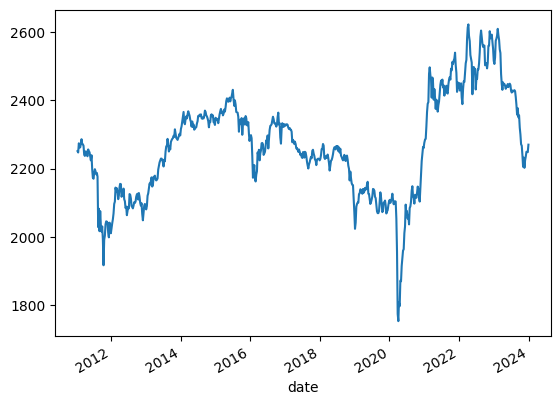

In [14]:
num_stocks = df.groupby("date", group_keys=True).ret.count()
num_stocks.index = pd.to_datetime(num_stocks.index)
num_stocks.plot()

### Preliminary analysis

- To understand how returns depend on momentum and value, we start by sorting into quintiles each week on each characteristic.
- We intersect the two sorts, forming 25 groups each week.
- We calculate average returns within each group.  These are equally weighted portfolio returns.

In [15]:
df["pb_quintile"] = df.groupby("date", group_keys=False).pb.apply(
    lambda x: pd.qcut(x, 5, labels=range(1, 6))
)
df["mom_quintile"] = df.groupby("date", group_keys=False).mom.apply(
    lambda x: pd.qcut(x, 5, labels=range(1, 6))
)
sorted_rets = df.groupby(
    ["date", "pb_quintile", "mom_quintile"], 
    observed=True,
    group_keys=True
).ret.mean()
sorted_rets = sorted_rets.unstack(["pb_quintile", "mom_quintile"])

In [16]:
sorted_rets.head()

pb_quintile          1                                                 2  \
mom_quintile         1         2         3         4         5         1   
date                                                                       
2011-01-14    0.003848 -0.002287  0.006847 -0.000550  0.000852 -0.014294   
2011-01-21    0.012342  0.008409  0.009834  0.015451  0.002926  0.016729   
2011-01-28   -0.019970 -0.003331 -0.005422 -0.011979 -0.021571 -0.018761   
2011-02-04   -0.004283  0.006279 -0.005805  0.010473  0.014758 -0.005800   
2011-02-11    0.015693  0.022936  0.020645  0.020812  0.025529  0.016449   

pb_quintile                                           ...         4            \
mom_quintile         2         3         4         5  ...         1         2   
date                                                  ...                       
2011-01-14   -0.007331 -0.017853 -0.005665 -0.003503  ... -0.002017 -0.008608   
2011-01-21    0.017019  0.005577  0.011915  0.008766  ...  0.019471  0.011235   
2011-01-28   -0.013485 -0.011322 -0.022904 -0.024932  ... -0.028604 -0.025485   
2011-02-04    0.004836 -0.001052  0.006198  0.019444  ... -0.011771 -0.000415   
2011-02-11    0.015239  0.019683  0.026489  0.030514  ...  0.017176  0.031344   

pb_quintile                                        5                      \
mom_quintile         3         4         5         1         2         3   
date                                                                       
2011-01-14   -0.011751 -0.000972  0.004042 -0.010017 -0.016354 -0.011555   
2011-01-21    0.016113  0.012968  0.028114  0.003879  0.009990 -0.000224   
2011-01-28   -0.029492 -0.015414 -0.036851 -0.029170 -0.041022 -0.028589   
2011-02-04    0.003025  0.005043  0.010816 -0.001913 -0.014447 -0.007645   
2011-02-11    0.018916  0.036835  0.031097  0.025140  0.017540  0.026404   

pb_quintile                       
mom_quintile         4         5  
date                              
2011-01-14    0.000095  0.011148  
2011-01-21    0.019024  0.008260  
2011-01-28   -0.024798 -0.041725  
2011-02-04    0.004717  0.006695  
2011-02-11    0.023187  0.041926  

[5 rows x 25 columns]

In [17]:
mean_sorted_rets = sorted_rets.mean()
mean_sorted_rets = mean_sorted_rets.unstack()
(52*mean_sorted_rets).round(3)

mom_quintile,1,2,3,4,5
pb_quintile,,,,,
1,0.038,0.134,0.159,0.163,0.140
2,0.057,0.105,0.116,0.110,0.128
3,0.068,0.095,0.106,0.103,0.132
4,0.084,0.091,0.109,0.127,0.128
5,0.001,0.077,0.110,0.094,0.152


### Example strategy

- Compute momentum rank each week (1 = highest = best)
- Compute value rank each week (1 = lowest = best)
- Average ranks
- Hold 50 stocks with best (1 = best) ranks each week, equally weighted
- Compare to 50 stocks with worst ranks each week, equally weighted and compare to all stocks

### Best stocks

In [18]:
mom_rank = df.groupby("date", group_keys=False).mom.rank(ascending=False)
pb_rank = df.groupby("date", group_keys=False).pb.rank()
avg_rank = (mom_rank + pb_rank) / 2

starting_from_best = avg_rank.groupby("date", group_keys=False).rank()
best = df[starting_from_best <= 50]
best_rets = best.groupby("date", group_keys=True).ret.mean()
best_rets.index = pd.to_datetime(best_rets.index)

### Worst and all stocks

In [19]:
starting_from_worst = avg_rank.groupby(
    "date", 
    group_keys=False
).rank(ascending=False)
worst = df[starting_from_worst <= 50]
worst_rets = worst.groupby("date", group_keys=True).ret.mean()
worst_rets.index = pd.to_datetime(worst_rets.index)

all_rets = df.groupby("date", group_keys=True).ret.mean()
all_rets.index = pd.to_datetime(all_rets.index)

### Cumulative returns

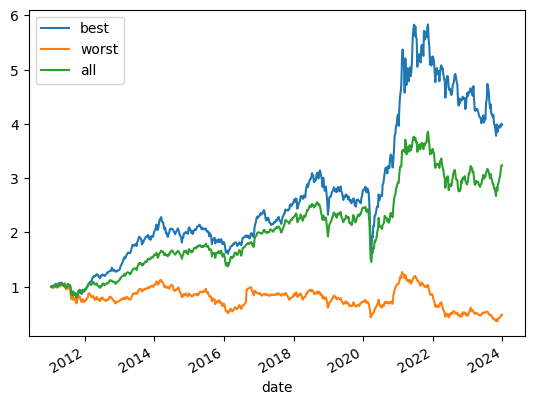

In [20]:
import matplotlib.pyplot as plt
(1+best_rets).cumprod().plot(label="best")
(1+worst_rets).cumprod().plot(label="worst")
(1+all_rets).cumprod().plot(label="all")
plt.legend()
plt.show()